# <b style='color:green'>Employee Turnover EDA <b>

## <span style="color:#1789B6 ;">Introduction</span>

#### <b>Context:</b>
#### This EDA aims to explore a database provided by a large US company (no name given for privacy reasons). The management department is worried about the relatively high turnover. They want to find ways to reduce the number of employees leaving the company and to better understand the situation, which employees are more likely to leave, and why.

#### The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

### <b style='color:#DD702C ;'> Problem Statement:</b> <b>"How can the company reduce the monthly employee turnover by 10% within the next 6 months through actionable insights derived from analyzing employee feedback, performance reviews, and compensation?" </b>

---

## Part I: <span style="color:purple">Descriptive Statistics</span>

### <span style="color:#1789B6 ;">Configuration</span>

In [130]:
# Import censsary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from math import ceil
from scipy.stats import shapiro, skew, kurtosis
sns.set_style("darkgrid")


In [10]:
# Load the dataset
df = pd.read_csv(r"C:\Users\User\Jupyter Projects\capstone_II\employee_churn_data.csv")

---

## <span style="color:#1789B6 ;">Data Preprocessing</span>

### Initial exploration

In [10]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [26]:
# Confirm no null values
df.sum().isnull()

department       False
promoted         False
review           False
projects         False
salary           False
tenure           False
satisfaction     False
bonus            False
avg_hrs_month    False
left             False
dtype: bool

In [106]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows = {duplicate_rows.shape[0]}")

Number of duplicate rows = 0


### Descriptive Stats Overview

In [107]:
# Select only numeric columns, exclude the binary columns 'promoted' and 'bonus', and display the top-level descriptive statistics.
df_numerical = df.select_dtypes(include=['int64', 'float64']).drop(columns=['promoted', 'bonus'])

df_numerical.describe()

,review,projects,tenure,satisfaction,avg_hrs_month
count,9.540000e+03,9540.000000,9540.000000,9540.000000,9.540000e+03
mean,3.783723e-02,3.274843,6.556184,0.016365,5.238542e-03
std,7.386198e-01,0.579136,1.415432,0.672398,6.624708e-01
min,-2.921830e+00,2.000000,2.000000,-2.123723,-2.118512e+00
25%,-4.725107e-01,3.000000,5.000000,-0.483383,-5.045390e-01
50%,-4.806268e-16,3.000000,7.000000,0.000000,-2.271322e-15
75%,5.274893e-01,4.000000,8.000000,0.516617,4.954610e-01
max,3.052463e+00,5.000000,12.000000,2.117060,2.594508e+00


In [74]:
# Check for Gaussian distribution qualities for each attribute
for col in columns:
    _, p_value = shapiro(df[col])
    if p_value > 0.05:
        print(f"{col} looks like Gaussian (fail to reject H0)")
    else:
        print(f"{col} does not look like Gaussian (reject H0)")

review does not look like Gaussian (reject H0)
projects does not look like Gaussian (reject H0)
tenure does not look like Gaussian (reject H0)
satisfaction does not look like Gaussian (reject H0)
avg_hrs_month does not look like Gaussian (reject H0)


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


---

## <span style="color:#1789B6 ;">EDA</span>

### Distribution Analysis

<Figure size 1500x400 with 0 Axes>

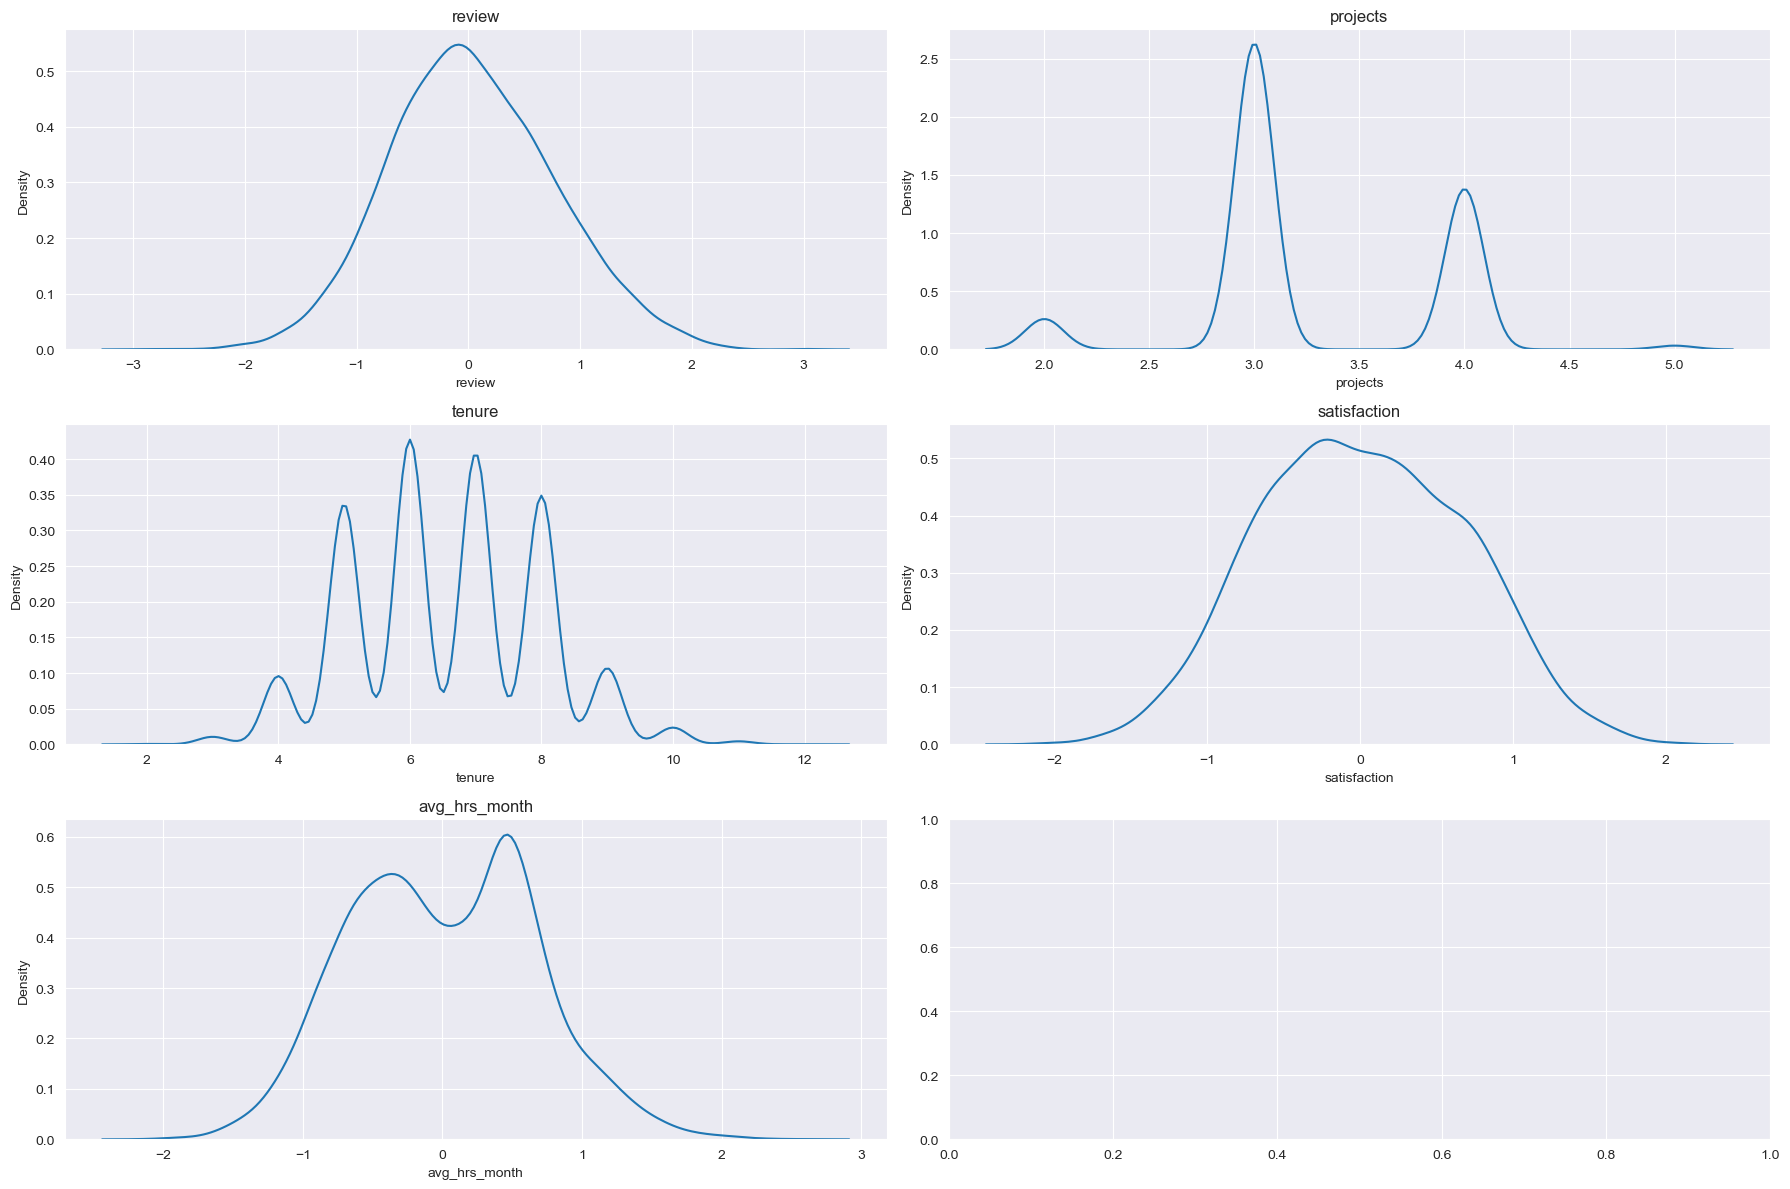

In [141]:
plt.figure(figsize=(15,4))

# Create a separate graph for each column's boxplot
columns = df_numerical.columns

# Set up the figure and axes
fig, axs = plt.subplots(3,2, figsize=(18, 12)) 

# Plot the columns
for i, column in enumerate(columns):
    row = i // 2  # Integer division to get row index
    col = i % 2   # Remainder to get column index
    sns.kdeplot(df_numerical[column], ax=axs[row, col])
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

### Exploration of Employees Exited

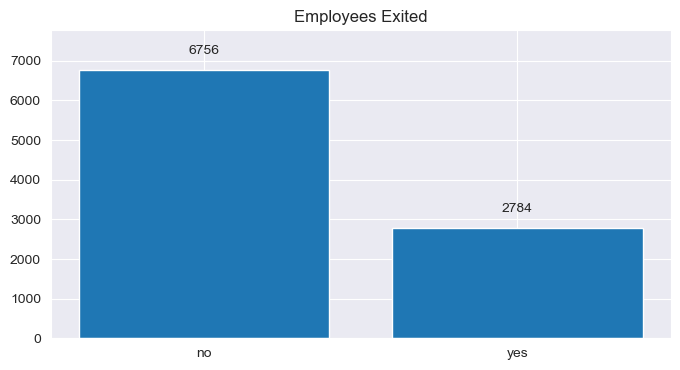

In [109]:
# Plot the distribution of exited employees
values = df['left'].value_counts()
positions = range(len(values))

# Plot the graph
plt.figure(figsize=(8,4))
plt.title('Employees Exited')
bars = plt.bar(positions, values, align='center')

# Set xticks
plt.xticks(positions, values.index)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,  # x position
             height + 0.05 * max(values),  # y position (with a small offset)
             str(height), 
             ha='center', va='bottom')
    
# Adjust y-axis limit to fit the label
plt.ylim(0, max(values) + 0.15 * max(values))
    
plt.show()

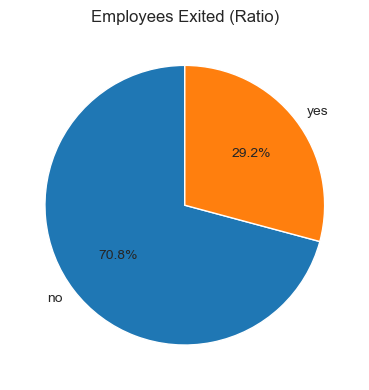

In [115]:
# Visualize as a ratio
plt.figure(figsize=(8,4))
df['left'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Employees Exited (Ratio)')
plt.ylabel(None)
plt.tight_layout()
plt.show()

### Exploration of Categorical Features

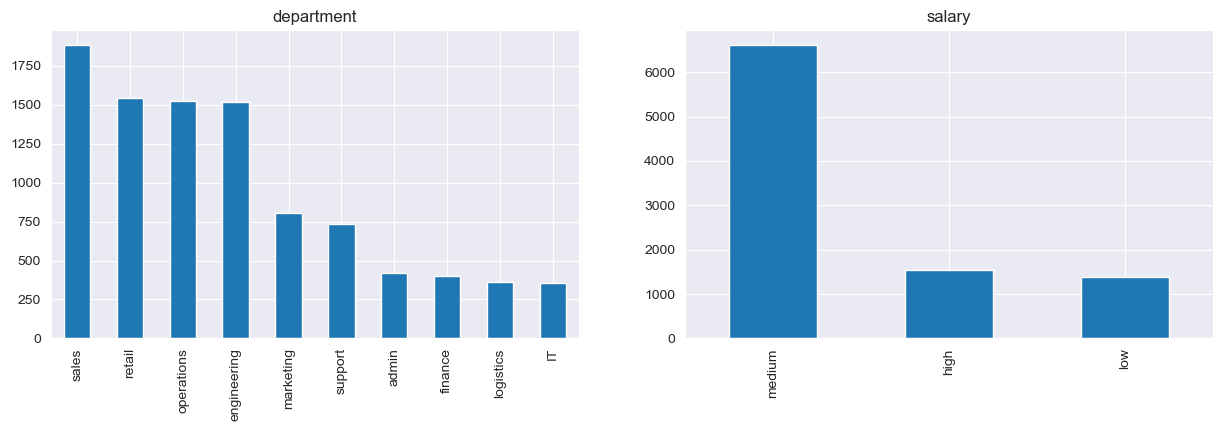

In [129]:
categorical = ['department', 'salary']

plt.figure(figsize=(15,4))

for i, col in enumerate(categorical):
    plt.subplot(1, 2, i+1)  # 1 row, 2 columns, index i+1
    plt.title(col)
    df[col].value_counts().plot(kind='bar')    
plt.show()

### Observing Outliers

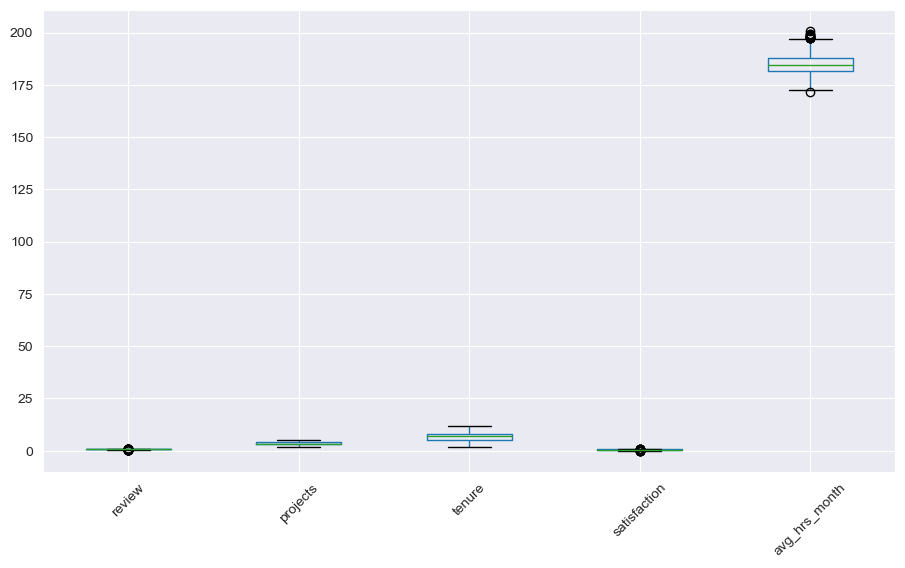

In [52]:
# Visualize the numerical values as Box plots
plt.figure(figsize=(11,6))
df_numerical.boxplot()
plt.xticks(rotation=45)
plt.show()

#### It appears that there are some outliers in the <b> 'review', 'satisfaction'</b>, and <b>'avg_hrs_month'</b> columns. We should observe these more closely.

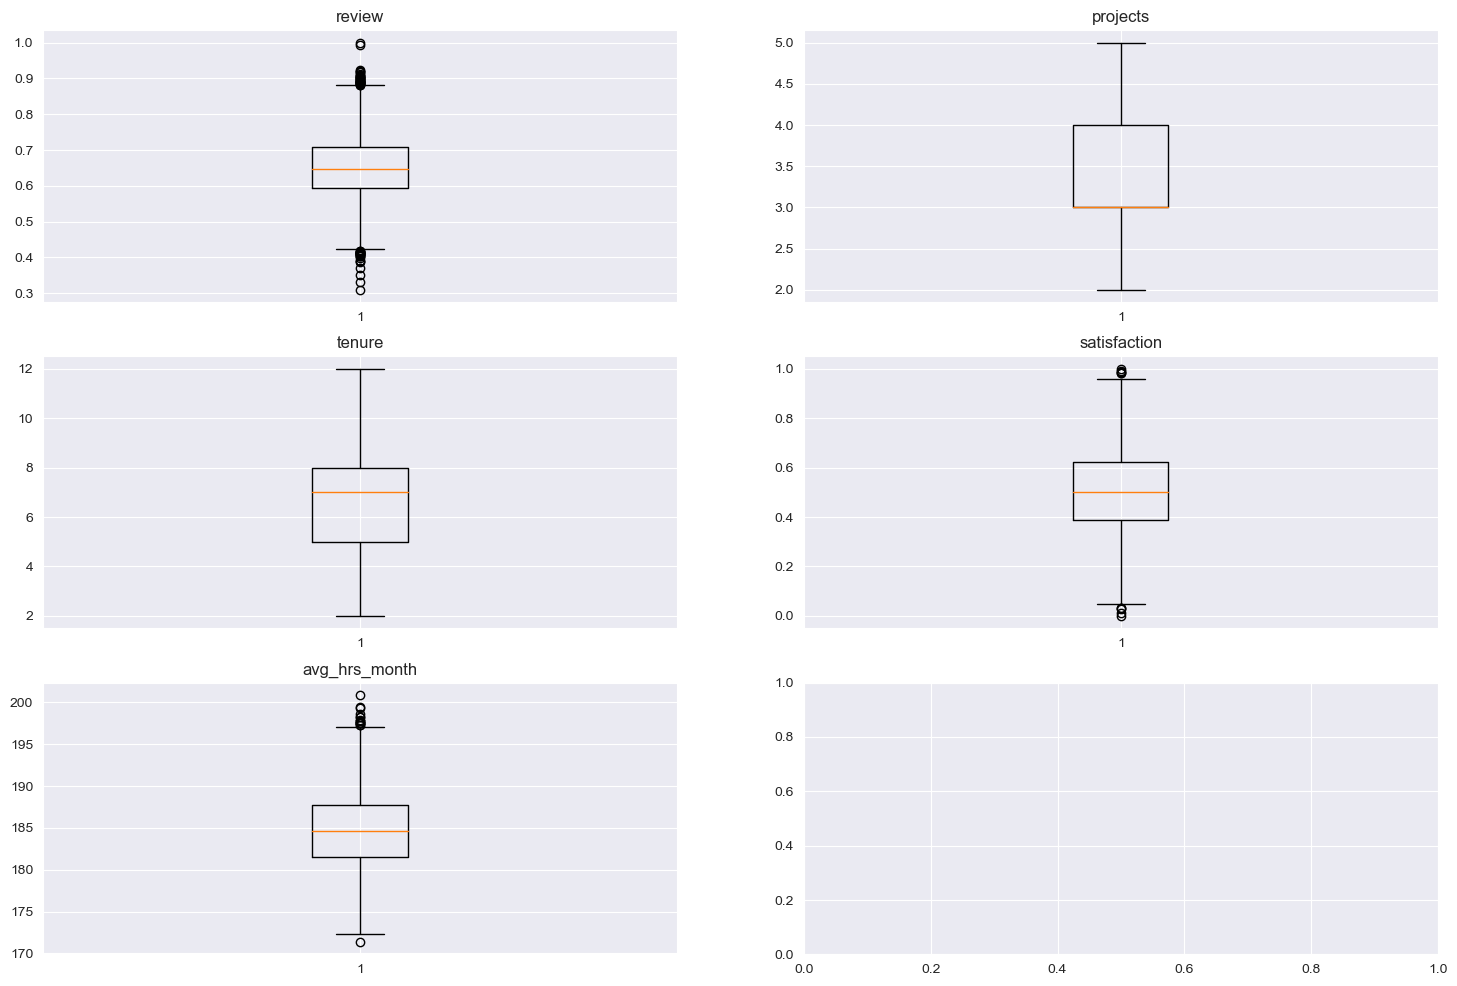

In [75]:
# Create a separate graph for each column's boxplot
columns = df_numerical.columns
n = len(df_numerical.columns)

# Set up the figure and axes
fig, axs = plt.subplots(3,2, figsize=(18, 12)) 

# Plot the columns
for i, column in enumerate(columns):
    row = i // 2  # Integer division to get row index
    col = i % 2   # Remainder to get column index
    axs[row, col].boxplot(df_numerical[column])
    axs[row, col].set_title(column)
    
plt.show()

#### Let's view the number of outliers as a % for the three columns of interest.

In [86]:
# Set columns of interest with outliers
outlier_columns = df[['review', 'satisfaction', 'avg_hrs_month']]

# Set the quartiles
Q1 = outlier_columns.quantile(.25, numeric_only=True)
Q3 = outlier_columns.quantile(.75, numeric_only=True)

In [95]:
print(Q1, "\n", Q3)

review             0.592884
satisfaction       0.386801
avg_hrs_month    181.472085
Name: 0.25, dtype: float64 
 review             0.708379
satisfaction       0.622607
avg_hrs_month    187.728708
Name: 0.75, dtype: float64


In [96]:
# Set IQR
IQR = Q3 - Q1
IQR

review           0.115495
satisfaction     0.235806
avg_hrs_month    6.256624
dtype: float64

In [98]:
# Create lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [100]:
# Align the DataFrame and Series objects
aligned_df, lower_limit = outlier_columns.align(lower_limit, axis=1, copy=False)
aligned_df, upper_limit = outlier_columns.align(upper_limit, axis=1, copy=False)

# Find the outliers
outliers_mask = ((aligned_df < lower_limit) | (aligned_df > upper_limit)).any(axis=1)
outliers = aligned_df[outliers_mask]

# Calculate percentage of outliers
percentage_outliers = str(round((len(outliers) / len(outlier_columns)) * 100, 2)) + "%"
percentage_outliers

'0.85%'

#### We can observe that <b> < 1% </b> of the data <b> consists of outliers</b> for those columns. Given that the outliers are genuine and not made in error, we are not going to remove them from the dataset. 
#### However, the goal is to create a logitstic regression model, therfor we should use a robust scaler method to make the model more robust to outliers.

In [104]:
from sklearn.preprocessing import RobustScaler

# Instantiate the scaler
scaler = RobustScaler()

# Fit the scaler to the columns with outliers and transform
df[['review', 'satisfaction', 'avg_hrs_month']] = scaler.fit_transform(df[['review', 'satisfaction', 'avg_hrs_month']])

---

## Part II: <span style="color:purple">Inferential Statistics</span>

## <span style="color:#1789B6 ;">Modeling</span>

---

## <span style="color:#1789B6 ;">Results and Interpretation</span>

---

## <span style="color:#1789B6 ;">Insights and Recommendations</span>

---

### <b> Data Source </b>: https://www.kaggle.com/datasets/marikastewart/employee-turnover